# 1 - Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit, grad, config
import qcsys as qs
import jax.numpy as jnp
from tqdm import tqdm
import matplotlib.pyplot as plt

config.update("jax_enable_x64", True)

# 2 - Fixed Frequency Transmon

In [3]:
Ec_q = 0.3
Ej_q = 15

qubit = qs.Transmon.create(
    23,
    {"Ec": Ec_q, "Ej": Ej_q},
    N_pre_diag=23,
    basis=qs.BasisTypes.fock,
    hamiltonian=qs.HamiltonianTypes.truncated,
)

In [4]:
qubit.eig_systems["vals"]

Array([-8.43843392e+00, -8.40344634e+00, -8.01056835e-02,  5.58079883e+00,
        1.08349064e+01,  1.54813618e+01,  1.82107453e+01,  1.89384675e+01,
        2.08624751e+01,  2.44792365e+01,  2.83128500e+01,  3.24754949e+01,
        3.71828557e+01,  4.24182591e+01,  4.82651490e+01,  5.46681332e+01,
        6.17795117e+01,  6.95362564e+01,  7.82048845e+01,  8.77078341e+01,
        9.86114790e+01,  1.11177592e+02,  1.26243695e+02], dtype=float64)

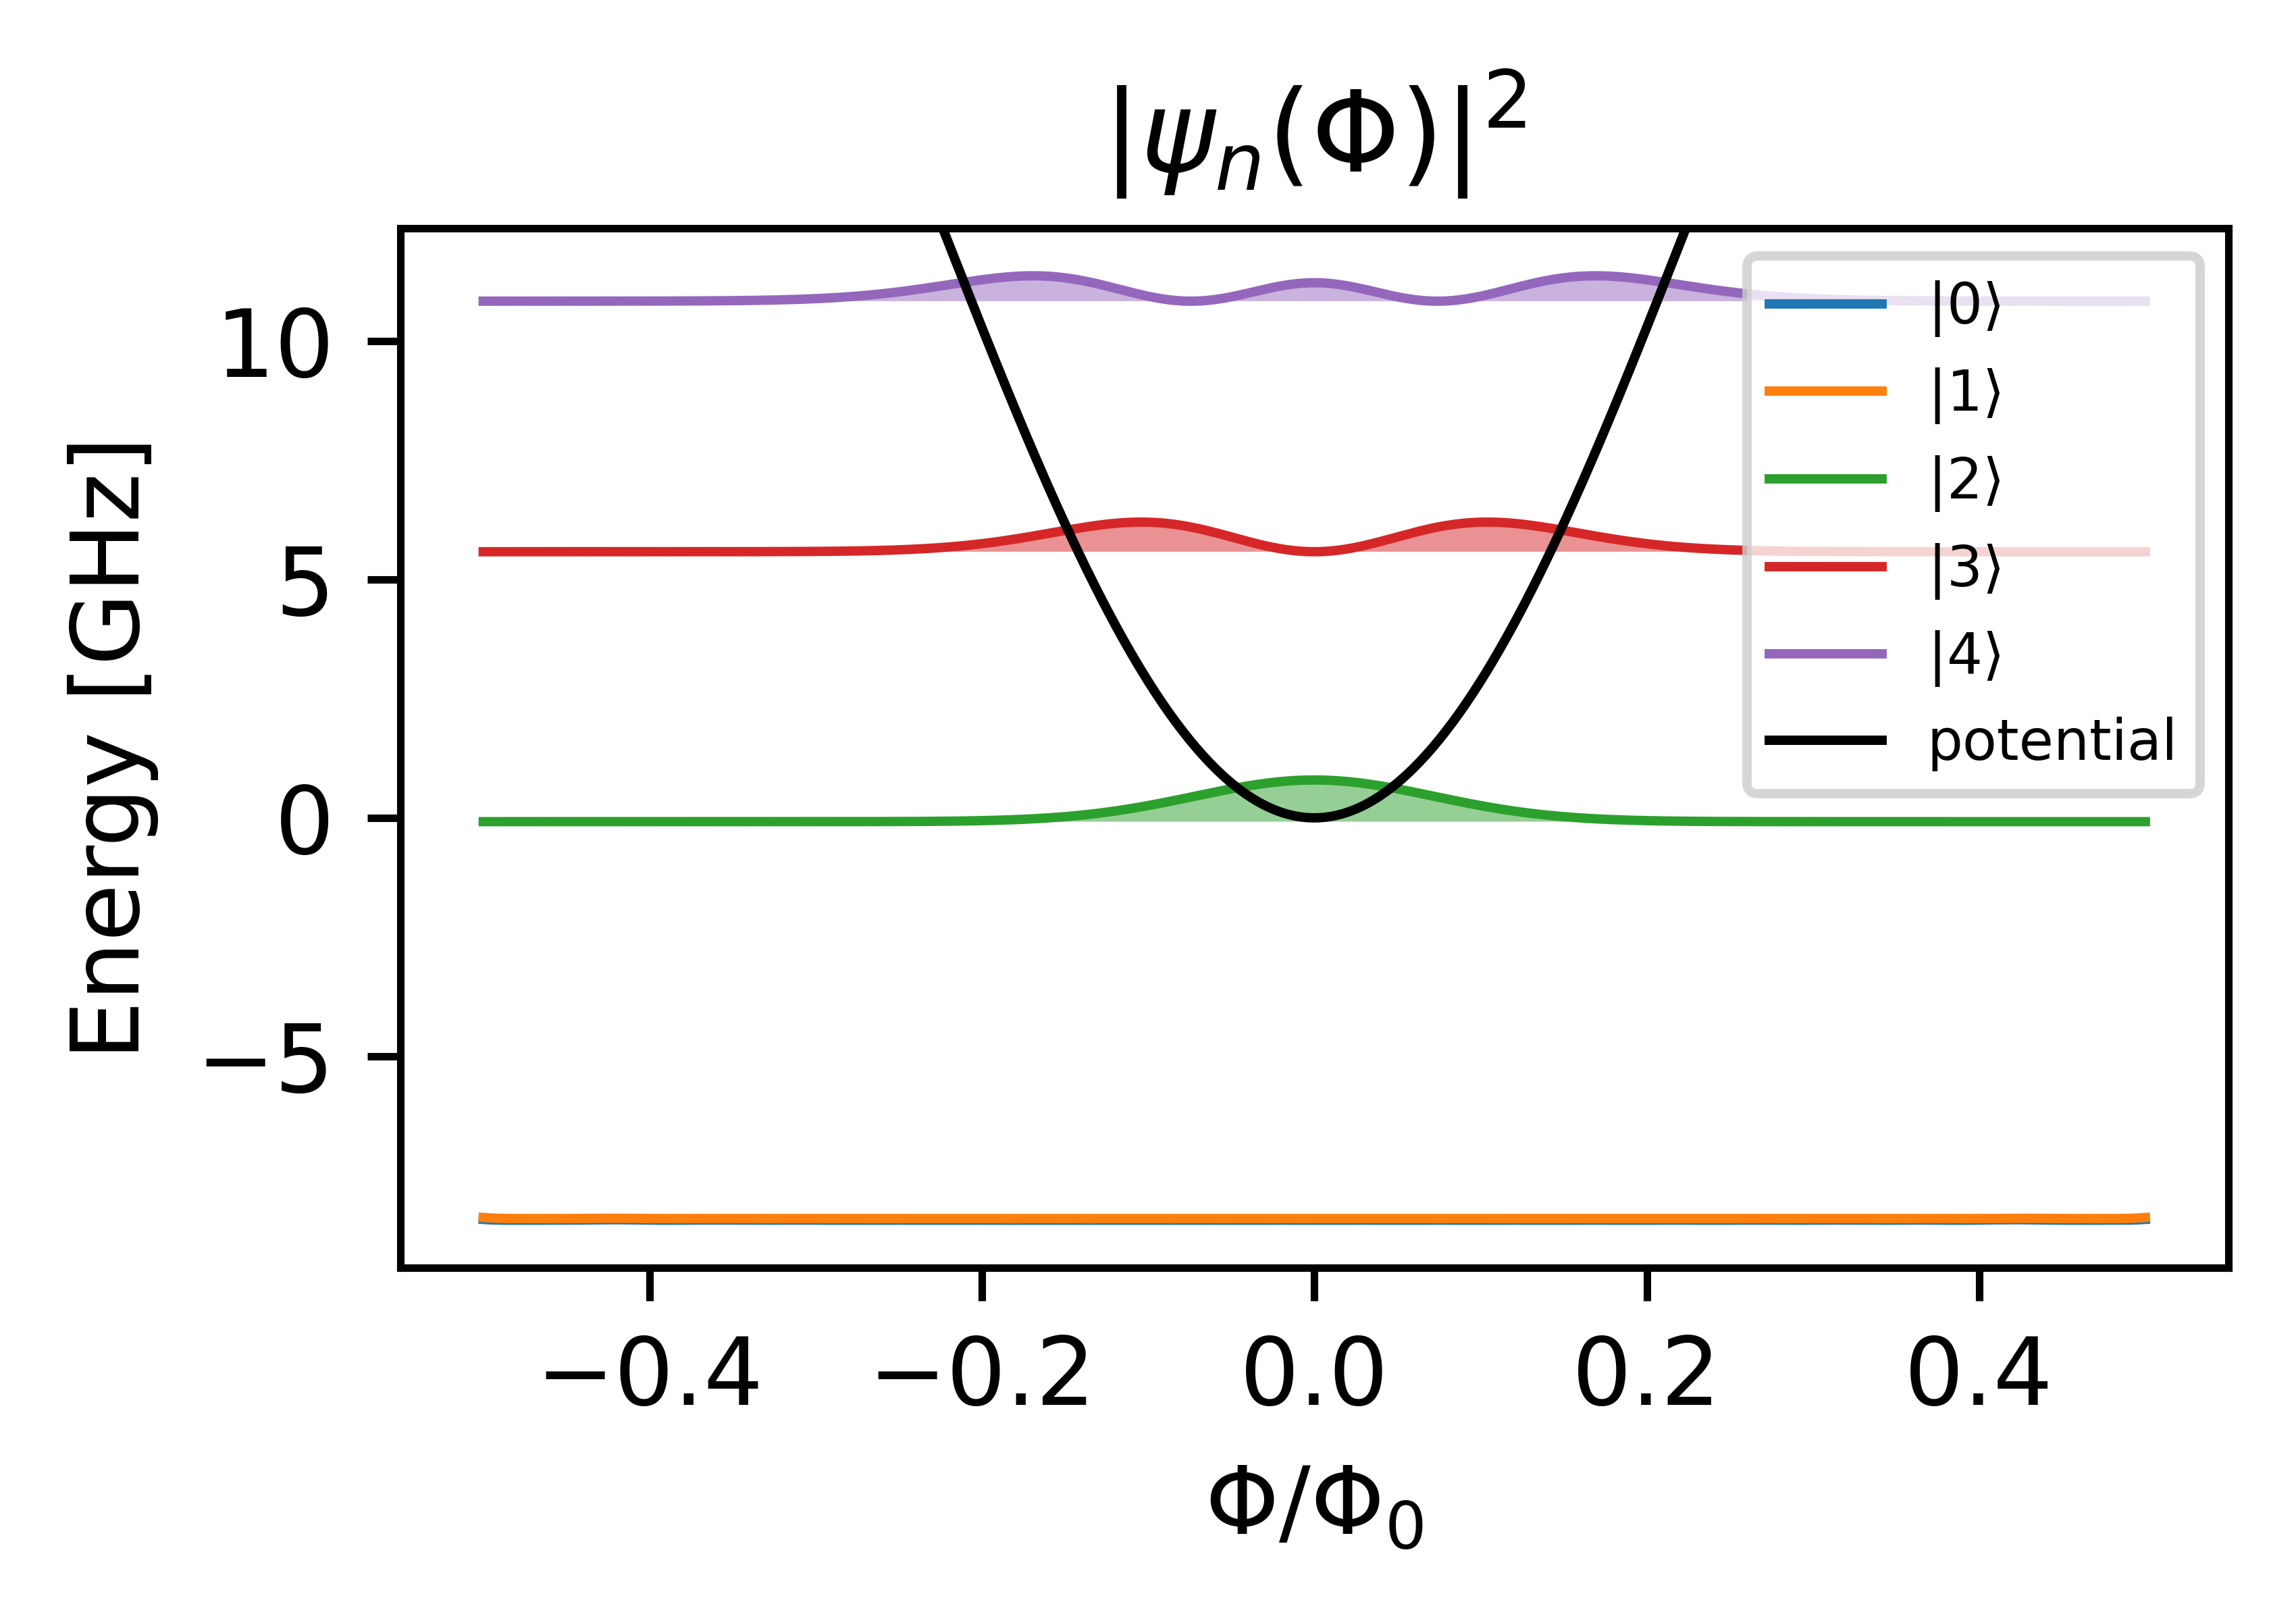

In [8]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals, max_n = 5)

In [4]:
jnp.sqrt(8*0.3*15)

Array(6., dtype=float64, weak_type=True)

In [5]:
Es = jnp.linalg.eigh(qubit.get_H_linear().data)[0]
Es[1:] - Es[:-1]

Array([6., 6., 6., 6., 6., 6., 6., 6., 6.], dtype=float64)

In [33]:
qubit = qs.Fluxonium.create(
    25,
    {"Ec": 0.3, "Ej": 10, "El": 0.5, "phi_ext": 0.4},
    use_linear=False,
    N_pre_diag=25,
)

Es = qubit.eig_systems["vals"]
Es[1:] - Es[:-1]

Array([1.86807028, 2.8171167 , 1.81942106, 2.54394777, 1.8027426 ,
       1.91947163, 1.64853165, 1.91420063, 0.61619494, 0.71138898,
       1.35651604, 1.44266698, 1.16131517, 1.12832592, 0.12414459,
       0.91109757, 1.40193416, 1.85090549, 1.5144302 , 0.78421506,
       1.14209157, 5.40839018, 1.26244352, 0.64377097], dtype=float64)

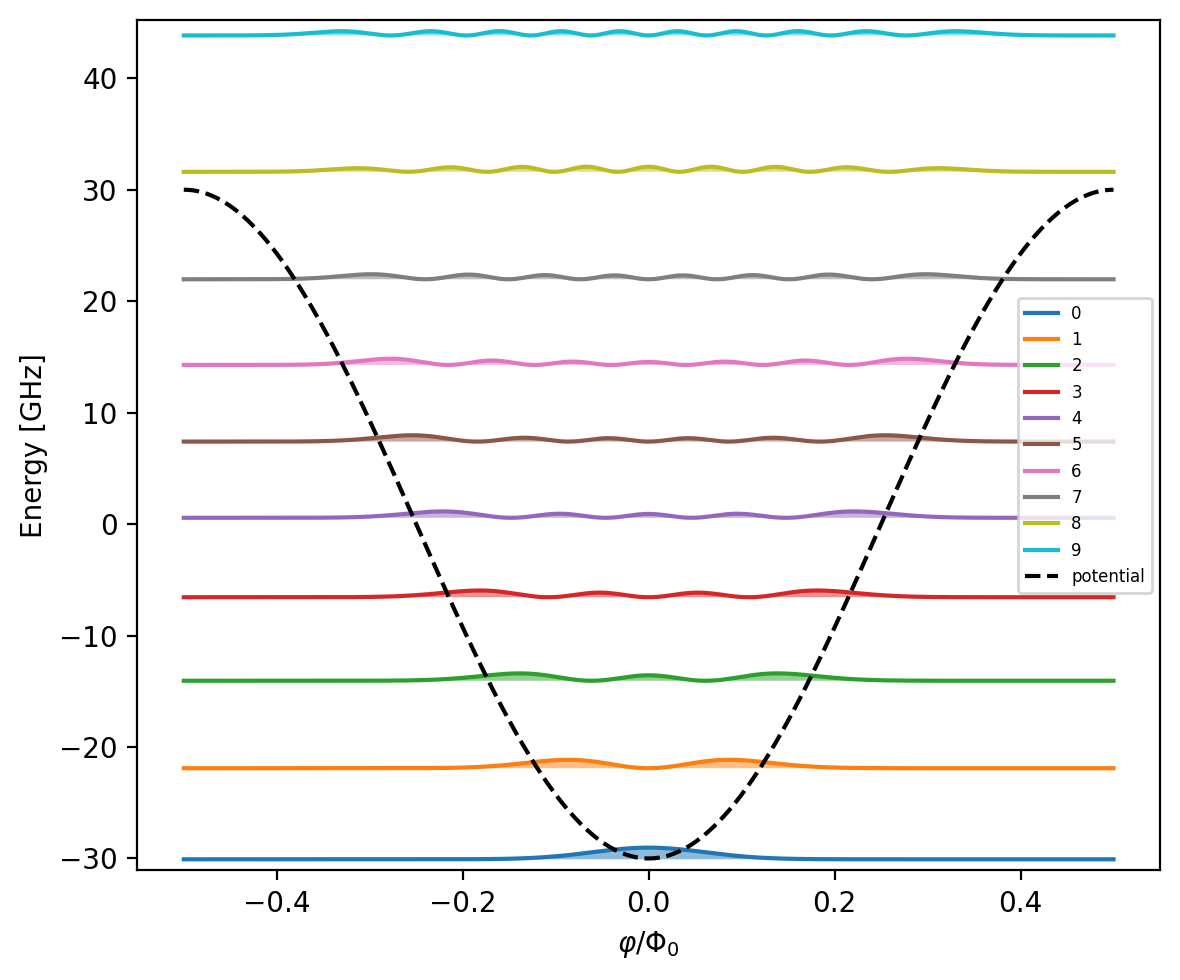

In [16]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals)

# 2 - Tunable Transmon with Symmetric SQUID

In [8]:
Ec_q = 0.3
Ej_q = 15

@jit
def gen_symmetric_tunable_transmon(phi_ext):
    qubit = qs.TunableTransmon.create(
        20,
        {"Ec": Ec_q, "Ej1": Ej_q, "Ej2": Ej_q, "phi_ext": phi_ext},
        use_linear=False,
        N_pre_diag=20,
    )
    return qubit

@jit
def get_energies(qubit):
    Es = qubit.eig_systems["vals"]
    f_10 = Es[1]-Es[0]
    f_21 = Es[2]-Es[1]
    return f_10, f_21

In [8]:
Ec_q = 0.3
Ej_q = 15
qubit = qs.TunableTransmon.create(
        10,
        {"Ec": Ec_q, "Ej1": Ej_q, "Ej2": Ej_q, "phi_ext": 0.0},
        use_linear=False,
        N_pre_diag=10,
    )
Es = qubit.eig_systems["vals"]
Es[1:] - Es[:-1]

Array([ 8.1735427 ,  7.84497161,  7.49355088,  7.1282169 ,  6.83662535,
        6.87755644,  7.6873636 ,  9.63965385, 12.23532435], dtype=float64)

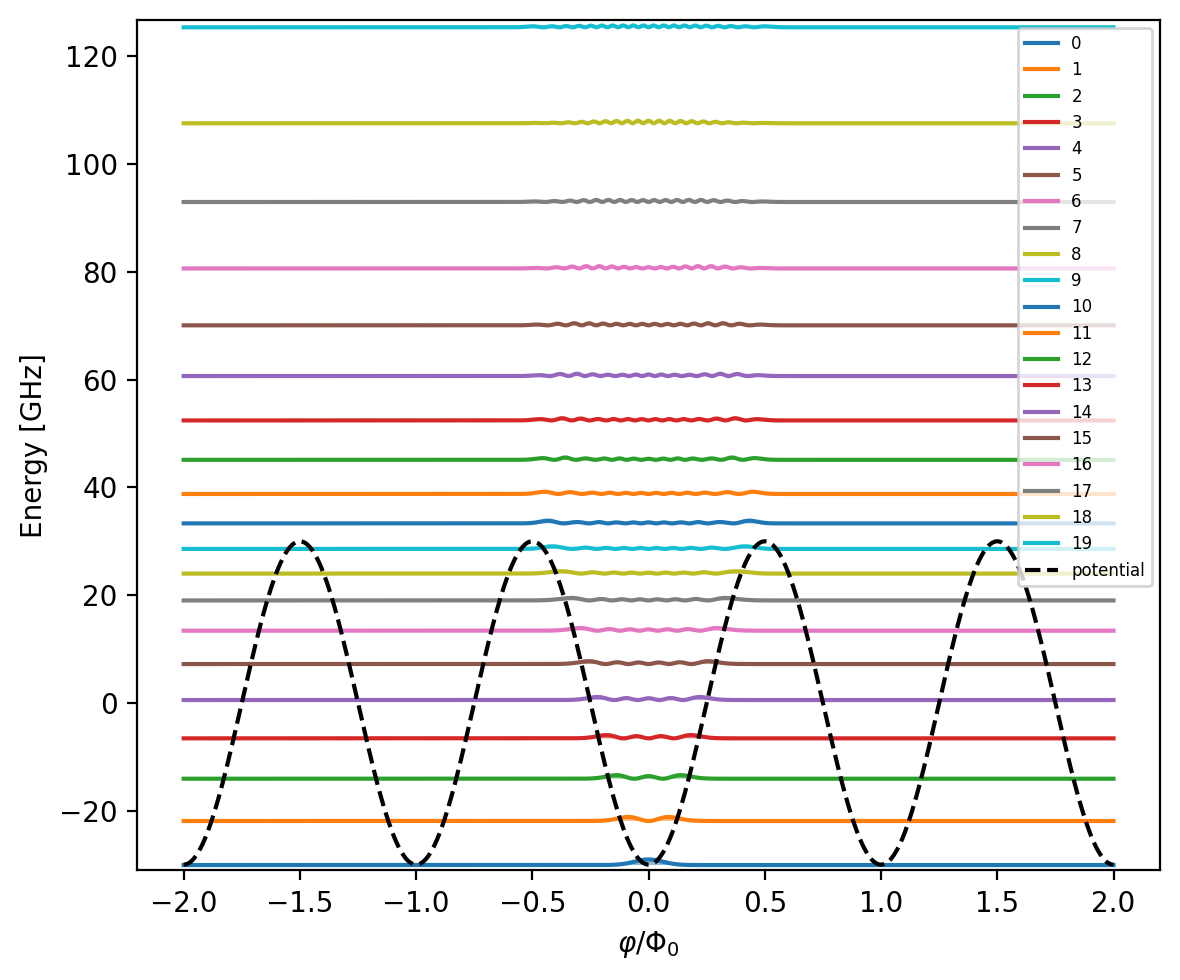

In [10]:
qubit = gen_symmetric_tunable_transmon(0.0)
phi_vals = jnp.linspace(-2,2,500)
axs = qubit.plot_wavefunctions(phi_vals)

In [4]:
phi_exts = jnp.linspace(-1,1,500)

f_10s = []
f_21s = []

for phi_ext in tqdm(phi_exts):
    qubit = gen_symmetric_tunable_transmon(phi_ext)
    f_10, f_21 = get_energies(qubit)
    f_10s.append(f_10)
    f_21s.append(f_21)

f_10s = jnp.array(f_10s)
f_21s = jnp.array(f_21s)

100%|██████████| 500/500 [00:04<00:00, 123.65it/s]


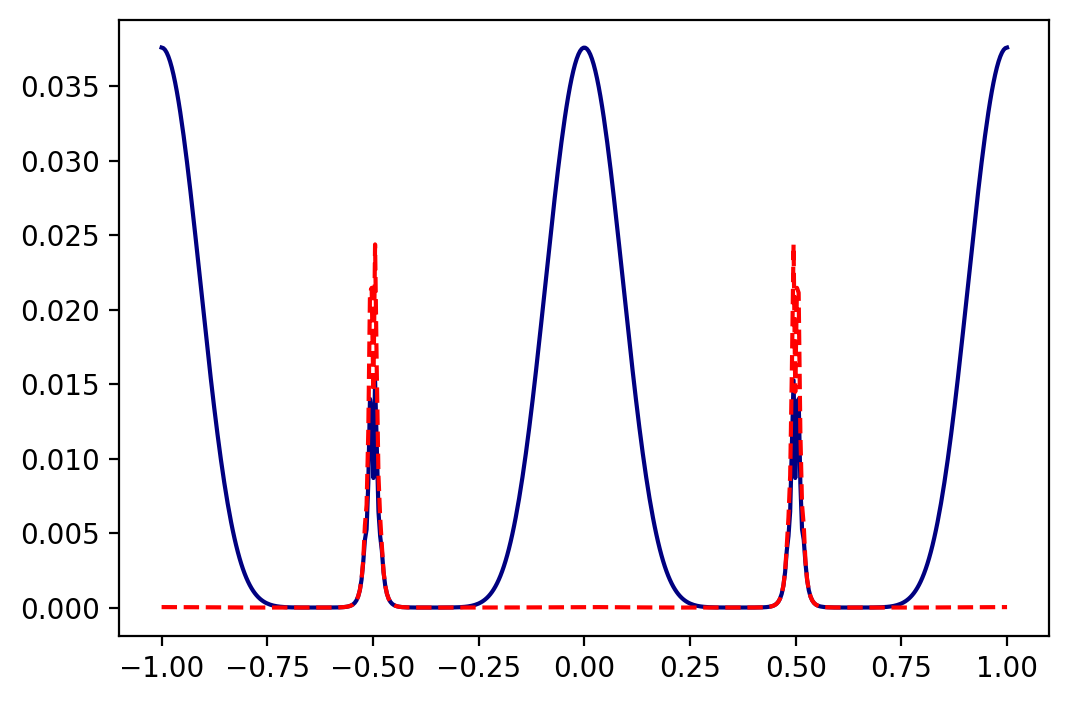

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=200)
ax.plot(phi_exts, f_10s, label=r"$\omega_{01}$", color="navy")
ax.plot(phi_exts, f_21s, label=r"$\omega_{12}$", color="red", linestyle="--")

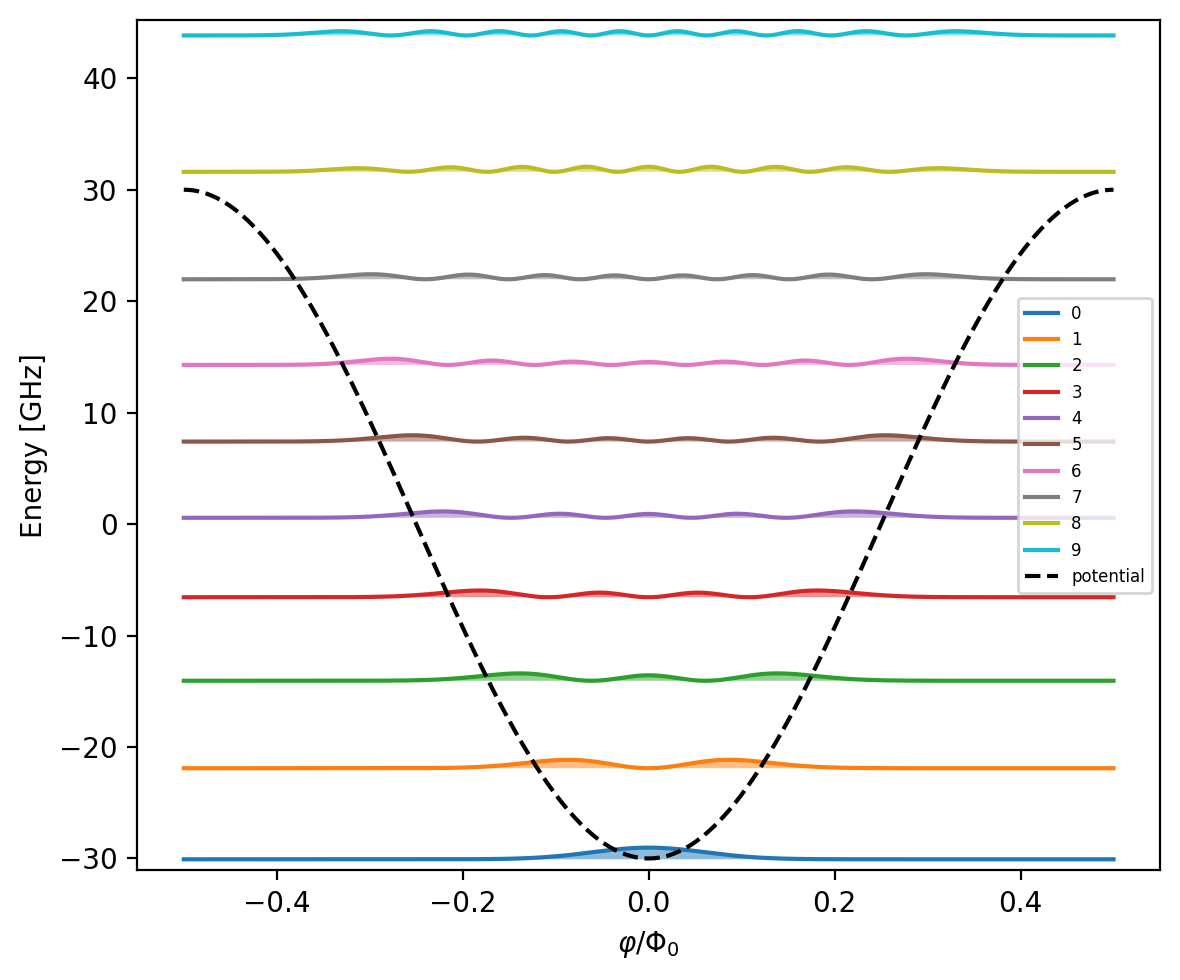

In [30]:
phi_vals = jnp.linspace(-0.5,0.5,500)
axs = qubit.plot_wavefunctions(phi_vals)